## Урок 11. Jupyter Notebook и несколько слов об аналитике

f(x) =(sin(x)/2 + cos(x)/2)** 2 * sin(x) - это для тех, кто хочет сложное уравнение
f(x) = x**2 - 6*abs(x) + 8 - это полегче.

Ответы давайте не из личных наблюдений, а стараясь подойти к этому с позиции "Пейн, я корни не вижу!"

Определить корни

Найти интервалы, на которых функция возрастает

Найти интервалы, на которых функция убывает

Построить график

Вычислить вершину

Определить промежутки, на котором f > 0

Определить промежутки, на котором f < 0

In [2]:
# Импорт необходимых библиотек

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import sympy as sp


### Задача 1.
f(x) = x**2 - 6*abs(x) + 8

In [3]:
# Определение функции

def f(x):
    return x**2 - 6 * np.abs(x) + 8


In [5]:
# Определение корней

# Решение уравнения для x >= 0
x = sp.Symbol('x')
func_positive = x**2 - 6*x + 8
roots_positive = sp.solve(func_positive, x)
roots_positive = [root.evalf() for root in roots_positive]

# Решение уравнения для x < 0
func_negative = x**2 + 6*x + 8
roots_negative = sp.solve(func_negative, x)
roots_negative = [root.evalf() for root in roots_negative]

# Объединение всех корней
roots = roots_positive + roots_negative
print("Корни:", roots)



Корни: [2.00000000000000, 4.00000000000000, -4.00000000000000, -2.00000000000000]


In [6]:
# Нахождение интервалов возрастания и убывания

# Нахождение производной и критических точек для x >= 0
f_prime_positive = sp.diff(func_positive, x)
critical_points_positive = sp.solve(f_prime_positive, x)
critical_points_positive = [cp.evalf() for cp in critical_points_positive]

# Нахождение производной и критических точек для x < 0
f_prime_negative = sp.diff(func_negative, x)
critical_points_negative = sp.solve(f_prime_negative, x)
critical_points_negative = [cp.evalf() for cp in critical_points_negative]

# Объединение всех критических точек
critical_points = critical_points_positive + critical_points_negative

# Определение интервалов возрастания и убывания
intervals = np.linspace(-10, 10, 400)
f_prime_values = np.array([f_prime_positive.subs(x, i).evalf() if i >= 0 else f_prime_negative.subs(x, i).evalf() for i in intervals])

increasing_intervals = []
decreasing_intervals = []

for i in range(len(f_prime_values) - 1):
    if f_prime_values[i] > 0:
        increasing_intervals.append((intervals[i], intervals[i+1]))
    elif f_prime_values[i] < 0:
        decreasing_intervals.append((intervals[i], intervals[i+1]))

print("Интервалы возрастания:", increasing_intervals)
print("Интервалы убывания:", decreasing_intervals)



Интервалы возрастания: [(-2.9824561403508776, -2.93233082706767), (-2.93233082706767, -2.882205513784461), (-2.882205513784461, -2.8320802005012533), (-2.8320802005012533, -2.7819548872180455), (-2.7819548872180455, -2.7318295739348377), (-2.7318295739348377, -2.68170426065163), (-2.68170426065163, -2.6315789473684212), (-2.6315789473684212, -2.5814536340852134), (-2.5814536340852134, -2.5313283208020056), (-2.5313283208020056, -2.481203007518797), (-2.481203007518797, -2.431077694235589), (-2.431077694235589, -2.3809523809523814), (-2.3809523809523814, -2.3308270676691736), (-2.3308270676691736, -2.280701754385966), (-2.280701754385966, -2.230576441102757), (-2.230576441102757, -2.1804511278195493), (-2.1804511278195493, -2.1303258145363415), (-2.1303258145363415, -2.080200501253133), (-2.080200501253133, -2.030075187969925), (-2.030075187969925, -1.9799498746867172), (-1.9799498746867172, -1.9298245614035086), (-1.9298245614035086, -1.8796992481203016), (-1.8796992481203016, -1.82957

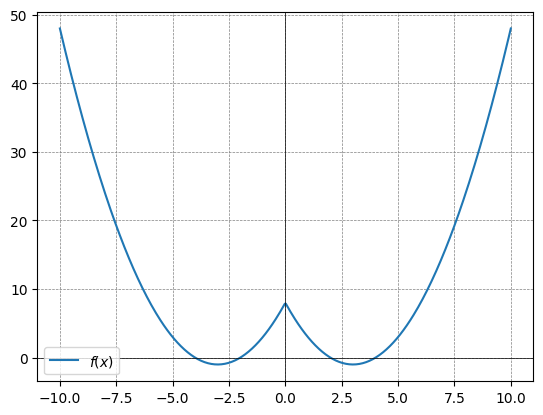

In [7]:
# Построение графика

x_vals = np.linspace(-10, 10, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='$f(x)$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


In [8]:
# Вычисление вершины

f_double_prime_positive = sp.diff(f_prime_positive, x)
f_double_prime_negative = sp.diff(f_prime_negative, x)

critical_points = [cp for cp in critical_points if (cp >= 0 and f_double_prime_positive.subs(x, cp) != 0) or (cp < 0 and f_double_prime_negative.subs(x, cp) != 0)]

vertices = [(cp.evalf(), f(cp)) for cp in critical_points]
print("Вершины:", vertices)



Вершины: [(3.00000000000000, -1.00000000000000), (-3.00000000000000, -1.00000000000000)]


In [9]:
# Определение промежутков, на которых 𝑓(𝑥)>0 и 𝑓(𝑥)<0

positive_intervals = []
negative_intervals = []

for i in range(len(y_vals) - 1):
    if y_vals[i] > 0:
        positive_intervals.append((x_vals[i], x_vals[i+1]))
    elif y_vals[i] < 0:
        negative_intervals.append((x_vals[i], x_vals[i+1]))

print("Интервалы, на которых f(x) > 0:", positive_intervals)
print("Интервалы, на которых f(x) < 0:", negative_intervals)



Интервалы, на которых f(x) > 0: [(-10.0, -9.949874686716791), (-9.949874686716791, -9.899749373433584), (-9.899749373433584, -9.849624060150376), (-9.849624060150376, -9.799498746867169), (-9.799498746867169, -9.74937343358396), (-9.74937343358396, -9.699248120300751), (-9.699248120300751, -9.649122807017545), (-9.649122807017545, -9.598997493734336), (-9.598997493734336, -9.548872180451127), (-9.548872180451127, -9.49874686716792), (-9.49874686716792, -9.448621553884712), (-9.448621553884712, -9.398496240601503), (-9.398496240601503, -9.348370927318296), (-9.348370927318296, -9.298245614035087), (-9.298245614035087, -9.24812030075188), (-9.24812030075188, -9.197994987468672), (-9.197994987468672, -9.147869674185463), (-9.147869674185463, -9.097744360902256), (-9.097744360902256, -9.047619047619047), (-9.047619047619047, -8.99749373433584), (-8.99749373433584, -8.947368421052632), (-8.947368421052632, -8.897243107769423), (-8.897243107769423, -8.847117794486216), (-8.847117794486216, -

### Задача 2.
f(x) =(sin(x)/2 + cos(x)/2)** 2 * sin(x)

In [10]:
# Определение функции

def f(x):
    return (np.sin(x)/2 + np.cos(x)/2)**2 * np.sin(x)


In [11]:
# Определение корней

# Символьное вычисление корней
x = sp.Symbol('x')
func = (sp.sin(x)/2 + sp.cos(x)/2)**2 * sp.sin(x)
roots = sp.solve(func, x)
roots = [root.evalf() for root in roots]
print("Корни:", roots)


Корни: [0, -0.785398163397448, 2.35619449019234, 3.14159265358979]


In [12]:
# Нахождение интервалов возрастания и убывания

# Символьное нахождение производной
f_prime = sp.diff(func, x)
critical_points = sp.solve(f_prime, x)
critical_points = [cp.evalf() for cp in critical_points]

# Определение интервалов возрастания и убывания
intervals = np.linspace(-2*np.pi, 2*np.pi, 400)
f_prime_values = [f_prime.subs(x, i).evalf() for i in intervals]

increasing_intervals = []
decreasing_intervals = []

for i in range(len(f_prime_values) - 1):
    if f_prime_values[i] > 0:
        increasing_intervals.append((intervals[i], intervals[i+1]))
    elif f_prime_values[i] < 0:
        decreasing_intervals.append((intervals[i], intervals[i+1]))

print("Интервалы возрастания:", increasing_intervals)
print("Интервалы убывания:", decreasing_intervals)


Интервалы возрастания: [(-6.283185307179586, -6.251690643985704), (-6.251690643985704, -6.220195980791821), (-6.220195980791821, -6.188701317597938), (-6.188701317597938, -6.157206654404056), (-6.157206654404056, -6.125711991210173), (-6.125711991210173, -6.09421732801629), (-6.09421732801629, -6.062722664822408), (-6.062722664822408, -6.031228001628525), (-6.031228001628525, -5.999733338434643), (-5.999733338434643, -5.96823867524076), (-5.96823867524076, -5.936744012046877), (-5.936744012046877, -5.905249348852995), (-5.905249348852995, -5.873754685659112), (-5.873754685659112, -5.842260022465229), (-5.842260022465229, -5.810765359271347), (-5.810765359271347, -5.7792706960774645), (-5.7792706960774645, -5.747776032883581), (-5.747776032883581, -5.716281369689699), (-5.716281369689699, -5.684786706495816), (-5.684786706495816, -5.653292043301933), (-5.653292043301933, -5.621797380108051), (-5.621797380108051, -5.590302716914168), (-5.590302716914168, -5.558808053720286), (-5.55880805

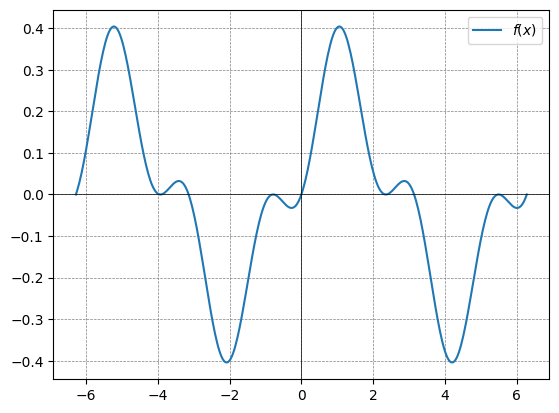

In [13]:
# Построение графика

x_vals = np.linspace(-2*np.pi, 2*np.pi, 400)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='$f(x)$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()


In [14]:
# Вычисление вершины

f_double_prime = sp.diff(f_prime, x)
critical_points = [cp for cp in critical_points if f_double_prime.subs(x, cp) != 0]

vertices = [(cp.evalf(), func.subs(x, cp).evalf()) for cp in critical_points]
print("Вершины:", vertices)


Вершины: [(-0.785398163397448, -2.17894099802631e-33), (2.35619449019234, 2.17894099802631e-33), (-2.08246597090872, -0.404106232073136), (2.86786413430617, 0.0324037814383501), (1.05912668268107, 0.404106232073136), (-0.273728519283620, -0.0324037814383501)]


In [15]:
# Определение промежутков, на которых 𝑓(𝑥)>0 и 𝑓(𝑥)<0

positive_intervals = []
negative_intervals = []

for i in range(len(y_vals) - 1):
    if y_vals[i] > 0:
        positive_intervals.append((x_vals[i], x_vals[i+1]))
    elif y_vals[i] < 0:
        negative_intervals.append((x_vals[i], x_vals[i+1]))

print("Интервалы, на которых f(x) > 0:", positive_intervals)
print("Интервалы, на которых f(x) < 0:", negative_intervals)


Интервалы, на которых f(x) > 0: [(-6.283185307179586, -6.251690643985704), (-6.251690643985704, -6.220195980791821), (-6.220195980791821, -6.188701317597938), (-6.188701317597938, -6.157206654404056), (-6.157206654404056, -6.125711991210173), (-6.125711991210173, -6.09421732801629), (-6.09421732801629, -6.062722664822408), (-6.062722664822408, -6.031228001628525), (-6.031228001628525, -5.999733338434643), (-5.999733338434643, -5.96823867524076), (-5.96823867524076, -5.936744012046877), (-5.936744012046877, -5.905249348852995), (-5.905249348852995, -5.873754685659112), (-5.873754685659112, -5.842260022465229), (-5.842260022465229, -5.810765359271347), (-5.810765359271347, -5.7792706960774645), (-5.7792706960774645, -5.747776032883581), (-5.747776032883581, -5.716281369689699), (-5.716281369689699, -5.684786706495816), (-5.684786706495816, -5.653292043301933), (-5.653292043301933, -5.621797380108051), (-5.621797380108051, -5.590302716914168), (-5.590302716914168, -5.558808053720286), (-5